In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.io

In [2]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\Code2.ipynb
data\SBJ01\S01\Test\runs_per_block.txt
data\SBJ01\S01\Test\testData.mat
data\SBJ01\S01\Test\testEvents.txt
data\SBJ01\S01\Test\testLabels.txt
data\SBJ01\S01\Test\testTargets.txt
data\SBJ01\S01\Train\trainData.mat
data\SBJ01\S01\Train\trainEvents.txt
data\SBJ01\S01\Train\trainLabels.txt
data\SBJ01\S01\Train\trainTargets.txt
data\SBJ01\S02\Test\runs_per_block.txt
data\SBJ01\S02\Test\testData.mat
data\SBJ01\S02\Test\testEvents.txt
data\SBJ01\S02\Test\testLabels.txt
data\SBJ01\S02\Test\testTargets.txt
data\SBJ01\S02\Train\trainData.mat
data\SBJ01\S02\Train\trainEvents.txt
data\SBJ01\S02\Train\trainLabels.txt
data\SBJ01\S02\Train\trainTargets.txt
data\SBJ01\S03\Test\runs_per_block.txt
data\SBJ01\S03\Test\testData.mat
data\SBJ01\S03\Test\testEvents.txt
data\SBJ01\S03\Test\testLabels.txt
data\SBJ01\S03\Test\testTargets.txt
data\SBJ01\S03\Train\trainData.mat
data\SBJ01\S03\Train\trainEvents.txt
data\SBJ01\S03\Train\trainLabels.txt
data\SBJ01\S03\Train\trainTargets.txt
data\SBJ

In [3]:
mats8s1 = scipy.io.loadmat('data/SBJ08/S01/Train/trainData.mat')
mats8s1.items()
mat2s8s1 = scipy.io.loadmat('data/SBJ08/S01/Test/testData.mat')
mat2s8s1.items()
X_trains8s1 = mats8s1["trainData"].transpose((2, 1, 0))
X_tests8s1 = mat2s8s1["testData"].transpose((2, 1, 0))
Y_trains8s1 = np.loadtxt("data/SBJ08/S01/Train/trainTargets.txt", dtype=int)
Y_tests8s1 = np.loadtxt("data/SBJ08/S01/Test/testTargets.txt", dtype=int)
##print(File_data)
##X_train.shape
X_trains8s1 = X_trains8s1[:, 50:200, 0:8]
Y_trains8s1 = Y_trains8s1[0:1600]
X_tests8s1 = X_tests8s1[:, 50:200,0:8]
#Y_train = Y_train[0:1600]
print(X_trains8s1.shape)
print(Y_trains8s1.shape)
print(X_tests8s1.shape)
print(Y_tests8s1.shape)

(1600, 150, 8)
(1600,)
(3200, 150, 8)
(3200,)


In [4]:
X_data=X_tests8s1
Y_data=Y_tests8s1

In [5]:
X_data = np.transpose(X_data, (0, 2, 1))

In [6]:
X_data.shape

(3200, 8, 150)

In [7]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(X_data[people,channel], 128, bd)

In [8]:
eeg_band = []
for i in range (len(X_data)):
    for j in range (len(X_data[0])):
        eeg_band.append(get_band_power(i,j,"delta"))
        eeg_band.append(get_band_power(i,j,"theta"))
        eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 512 is greater than input length  = 150, using nperseg = 150
  warnings.warn('nperseg = {0:d} is greater than input length '


In [9]:
eeg_band = np.array(eeg_band)
print(eeg_band.shape)

(128000,)


In [10]:
X_train=eeg_band

In [11]:
X_train.shape

(128000,)

In [12]:
X_train = X_train.reshape((3200,40))

In [13]:
Y_train=Y_data

In [14]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
Y_train.shape

(3200,)

In [16]:
# Get unique classes and their counts
unique_classes, counts = np.unique(Y_train, return_counts=True)

# Print class distribution
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Class 0: 2800 samples
Class 1: 400 samples


In [17]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled, y_resampled=ros.fit_resample(X_train, Y_train)

In [18]:
# Get unique classes and their counts
unique_classes, counts = np.unique(y_resampled, return_counts=True)

# Print class distribution
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Class 0: 2800 samples
Class 1: 2800 samples


In [19]:
X1_train=x_resampled
Y1_train=y_resampled

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X1_train)
X1_train=scaler.transform(X1_train)

In [21]:
# Sort based on Y_train
sorted_indices = np.argsort(Y1_train)
X_train_sorted = X1_train[sorted_indices]
Y_train_sorted = Y1_train[sorted_indices]

print("Sorted X_train:\n", X_train_sorted)
print("Sorted Y_train:\n", Y_train_sorted)

Sorted X_train:
 [[ 0.23123949 -0.61235973 -0.30110515 ...  0.2555442   0.28488918
   0.3369075 ]
 [-0.30095922 -0.19867755 -0.211716   ... -0.56298264 -0.45272903
  -0.47925278]
 [-0.37378489 -0.29118721 -0.12950779 ... -0.46278505 -0.41390942
  -0.4354125 ]
 ...
 [ 0.39372667  0.0867734   0.156807   ...  0.38770898  0.28937062
   0.38431992]
 [-0.03216253 -0.2706176  -0.23406737 ... -0.47206921 -0.43017031
  -0.43842779]
 [-0.42635117  1.25088396  0.17284836 ...  0.97261305  0.78117038
   0.80162958]]
Sorted Y_train:
 [0 0 0 ... 1 1 1]


In [22]:
X_train_sorted.shape

(5600, 40)

In [23]:
Y_train_sorted.shape

(5600,)

In [24]:
import os
import numpy as np
from PIL import Image

# Directory containing images
image_folder = "non_autistic"

# Define a fixed image size (e.g., 128x128)
IMG_SIZE = (128, 128)

# Lists to store image data and labels
image_data = []
labels = []

# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert('RGB')  # Open image and convert to RGB
        img = img.resize(IMG_SIZE)  # Resize to fixed dimensions
        img_array = np.array(img)  # Convert image to NumPy array
        image_data.append(img_array)  # Append to list
        labels.append(0)  # Label all images as 1 (autism)

# Convert lists to NumPy arrays
image_data = np.array(image_data, dtype=np.float32)  # Ensure homogeneous shape
labels = np.array(labels, dtype=np.int32)  # Integer labels

# Print shapes for verification
print("Image data shape:", image_data.shape)  # Should be (num_images, 128, 128, 3)
print("Labels shape:", labels.shape)  # Should be (num_images,)


Image data shape: (1263, 128, 128, 3)
Labels shape: (1263,)


In [25]:
import os
import numpy as np
from PIL import Image

# Directory containing images
image_folder = "autistic"

# Define a fixed image size (e.g., 128x128)
IMG_SIZE = (128, 128)

# Lists to store image data and labels
image_data=list(image_data)
labels=list(labels)

# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert('RGB')  # Open image and convert to RGB
        img = img.resize(IMG_SIZE)  # Resize to fixed dimensions
        img_array = np.array(img)  # Convert image to NumPy array
        image_data.append(img_array)  # Append to list
        labels.append(1)  # Label all images as 1 (autism)

# Convert lists to NumPy arrays
image_data = np.array(image_data, dtype=np.float32)  # Ensure homogeneous shape
labels = np.array(labels, dtype=np.int32)  # Integer labels

# Print shapes for verification
print("Image data shape:", image_data.shape)  # Should be (num_images, 128, 128, 3)
print("Labels shape:", labels.shape)  # Should be (num_images,)


Image data shape: (2526, 128, 128, 3)
Labels shape: (2526,)


In [26]:
X2_train=image_data
Y2_train=labels

In [27]:
X_eeg=X_train_sorted
Y_eeg=Y_train_sorted
X_img=image_data
Y_img=labels

In [28]:
print(len(X_eeg))

5600


In [29]:
X_eeg_0=np.array(X_eeg[0:1263])
X_eeg_1=np.array(X_eeg[2801:4064])
Y_eeg_0=np.array(Y_eeg[0:1263])
Y_eeg_1=np.array(Y_eeg[2801:4064])


In [30]:
print(np.shape(X_eeg_0))

(1263, 40)


In [31]:
X_eeg_data=np.vstack((X_eeg_0,X_eeg_1))
Y_eeg_data=np.vstack((Y_eeg_0,Y_eeg_1))

In [32]:
print(len(X_eeg_data))
print(len(X_img))

2526
2526


In [33]:
Y_eeg_data.shape

(2, 1263)

In [34]:
print(np.shape(X_img))

(2526, 128, 128, 3)


In [35]:
# Get unique classes and their counts
unique_classes, counts = np.unique(Y_eeg_data, return_counts=True)

# Print class distribution
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Class 0: 1263 samples
Class 1: 1263 samples


In [36]:
# Get unique classes and their counts
unique_classes, counts = np.unique(Y_img, return_counts=True)

# Print class distribution
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Class 0: 1263 samples
Class 1: 1263 samples


In [37]:
import cv2
# Function to apply filters
def apply_filters(images):
    processed_images = []
    for img in images:
        # Ensure input image is uint8
        img = img.astype(np.uint8)

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(img, (5, 5), 0)

        # Convert to grayscale (edge detection works on single channel)
        gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

        # Ensure grayscale image is also uint8
        gray = gray.astype(np.uint8)

        # Apply Sobel edge detection
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # X gradient
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Y gradient
        sobel = np.sqrt(sobelx**2 + sobely**2)

        # Normalize Sobel output and convert to uint8
        sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply Laplacian filter for second-order edges
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply Canny edge detection
        canny = cv2.Canny(gray, 50, 150)

        # Stack all processed images for visualization (optional)
        combined = np.stack([sobel, laplacian, canny], axis=-1)  # Shape (128, 128, 3)

        processed_images.append(combined)

    return np.array(processed_images, dtype=np.uint8)  # Ensure final output is uint8

# Apply filters to all images
filtered_images = apply_filters(X_img)

# Output shape (2526, 128, 128, 3)
print(filtered_images.shape)

(2526, 128, 128, 3)


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Flatten, 
    Concatenate, Dropout, GlobalAveragePooling2D
)
from tensorflow.keras.applications import EfficientNetB0

In [39]:
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

def build_eeg_model():
    eeg_input = Input(shape=(40, 1))  # EEG input with 40 time steps and 1 channel
    
    # Increased number of convolutional layers
    x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(eeg_input)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)  # New layer
    x = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(x)  # New layer
    
    # Change LSTM to Bidirectional LSTM (BiLSTM)
    x = Bidirectional(LSTM(128, return_sequences=False))(x)  
    
    # Flatten before passing to Dense layers
    x = Flatten()(x)  
    x = Dense(128, activation='relu')(x)  
    x = Dropout(0.5)(x)  # Dropout for regularization
    
    eeg_output = Dense(64, activation='relu')(x)  # Output before concatenation
    
    return Model(eeg_input, eeg_output, name="EEG_Model")

In [40]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

def build_image_model():
    image_input = Input(shape=(128, 128, 3))  # Image input

    # Load Pretrained Model (without the top classification layer)
    base_model = InceptionV3(weights='imagenet', include_top=False)
    
    # Set all layers trainable
    base_model.trainable = True  

    # Apply base model to input tensor
    x = base_model(image_input)  

    # Feature extraction layers
    x = GlobalAveragePooling2D()(x)  # Convert feature maps to a 1D vector
    x = Flatten()(x)  # Flatten layer to convert the output to 1D
    
    x = Dense(128, activation='relu')(x)  # Fully connected layer
    x = Dropout(0.5)(x)  # Dropout for regularization

    # Return the model with properly defined input and output tensors
    return Model(inputs=image_input, outputs=x, name="Image_Model")


In [41]:
from tensorflow.keras.layers import Concatenate, Dense
from tensorflow.keras.models import Model

def build_multimodal_model(eeg_model, image_model):
    # Combine features from EEG and Image models
    combined_input = Concatenate()([eeg_model.output, image_model.output])  # Merge the outputs
    
    # Fully connected layers
    x = Dense(128, activation='relu')(combined_input)
    x = Dense(64, activation='relu')(x)
    
    # Output layer (autism vs no autism)
    output = Dense(2, activation='softmax')(x)  # Two classes: Autism vs No Autism
    
    # Create the multimodal model
    model = Model(inputs=[eeg_model.input, image_model.input], outputs=output, name="Multimodal_Model")
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [42]:
# Create EEG and Image models
eeg_model = build_eeg_model()  # EEG model with shape (samples, 40, 1)
image_model = build_image_model()  # Image model with shape (samples, 128, 128, 3)

# Build the multimodal model
model = build_multimodal_model(eeg_model, image_model)

# Model summary
model.summary()




Model: "Multimodal_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 40, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 40, 32)               128       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 40, 64)               6208      ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 40, 128)              24704     ['conv1d_1[0][0]']            
                                                                                

In [43]:
import numpy as np

# Assuming y contains labels as 0 (Non-Autism) and 1 (Autism)
y = np.array(Y_img)  # Example labels
#array first part no autism and second part autism
# Convert to one-hot encoding
y_one_hot = np.eye(2, dtype=int)[y]

print(y_one_hot)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [201]:
# Convert integer labels to one-hot encoding
#y_one_hot = tf.keras.utils.to_categorical(Y_img, num_classes=2)


In [44]:
Y=y_one_hot

In [45]:
print(X_eeg_data.shape)
print(filtered_images.shape)

(2526, 40)
(2526, 128, 128, 3)


In [46]:
X_eeg_data=X_eeg_data.reshape(2526,40,1)

In [47]:
X_eeg_data.shape

(2526, 40, 1)

In [48]:
Y=np.array(Y)

In [49]:
#Y=Y.reshape(2526,1,2)
print(Y.shape)

(2526, 2)


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you already have:
# eeg_data: (2526, 40) → EEG feature vectors
# image_data: (2526, 128, 128, 3) → Image data
# labels: (2526,) → Corresponding labels (0 for no autism, 1 for autism)

# Define train/test split ratio (80% train, 20% test)
test_size = 0.2
random_seed = 42  # For reproducibility

# Split EEG, Image, and Labels together to maintain alignment
eeg_train, eeg_test, img_train, img_test, y_train, y_test = train_test_split(
    X_eeg_data, filtered_images, Y, test_size=test_size, random_state=random_seed, stratify=labels
)

# Print dataset shapes
print(f"EEG Train Shape: {eeg_train.shape}, EEG Test Shape: {eeg_test.shape}")
print(f"Image Train Shape: {img_train.shape}, Image Test Shape: {img_test.shape}")
print(f"Labels Train Shape: {y_train.shape}, Labels Test Shape: {y_test.shape}")


EEG Train Shape: (2020, 40, 1), EEG Test Shape: (506, 40, 1)
Image Train Shape: (2020, 128, 128, 3), Image Test Shape: (506, 128, 128, 3)
Labels Train Shape: (2020, 2), Labels Test Shape: (506, 2)


In [51]:
print(f"EEG Train Shape: {eeg_train.shape}")  
print(f"Image Train Shape: {img_train.shape}")  
print(f"Labels Train Shape: {y_train.shape}")  

EEG Train Shape: (2020, 40, 1)
Image Train Shape: (2020, 128, 128, 3)
Labels Train Shape: (2020, 2)


In [52]:
print(y_train.shape)  

(2020, 2)


In [53]:

history = model.fit(
    [eeg_train, img_train],  # Inputs (EEG and Image)
    y_train,  # Labels  Validation set
    epochs=100, 
    validation_split=0.22,  # Batch size
    verbose=1  # Show training progress
)


Epoch 1/100


50/50 [==============================] - 87s 1s/step - loss: 0.7180 - accuracy: 0.4921 - val_loss: 0.7084 - val_accuracy: 0.4876
Epoch 2/100
50/50 [==============================] - 55s 1s/step - loss: 0.7075 - accuracy: 0.5308 - val_loss: 0.6967 - val_accuracy: 0.5236
Epoch 3/100
50/50 [==============================] - 56s 1s/step - loss: 0.7032 - accuracy: 0.5270 - val_loss: 34.9115 - val_accuracy: 0.5146
Epoch 4/100
50/50 [==============================] - 54s 1s/step - loss: 0.6820 - accuracy: 0.5600 - val_loss: 8.6754 - val_accuracy: 0.5303
Epoch 5/100
50/50 [==============================] - 55s 1s/step - loss: 0.6761 - accuracy: 0.5517 - val_loss: 2.7942 - val_accuracy: 0.6045
Epoch 6/100
50/50 [==============================] - 55s 1s/step - loss: 0.6603 - accuracy: 0.6006 - val_loss: 45.8700 - val_accuracy: 0.5708
Epoch 7/100
50/50 [==============================] - 53s 1s/step - loss: 0.6438 - accuracy: 0.5886 - val_loss: 0.6959 - val_accuracy: 0.5011
Epoch 8/1

In [54]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
from tqdm import tqdm

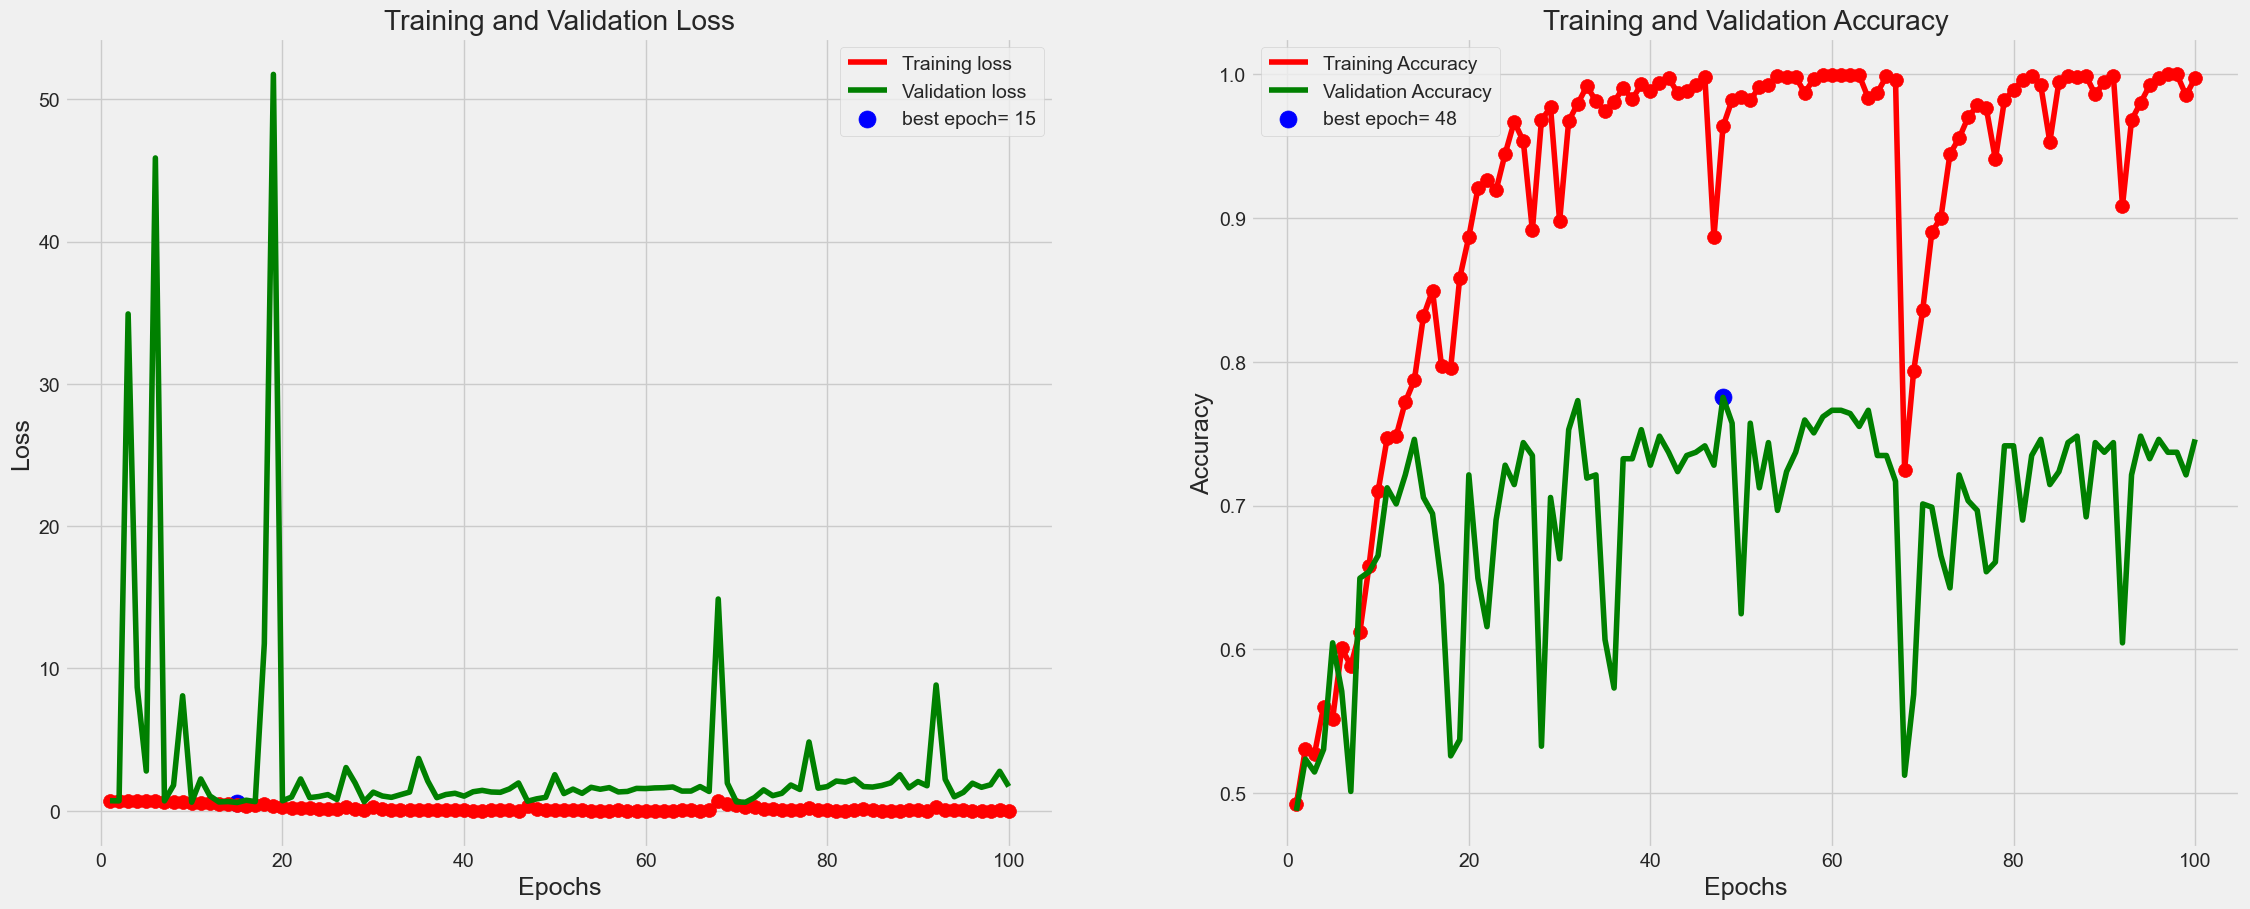

In [55]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss
    
loss_index=tr_plot(history,0)

In [56]:
y_pred_test = model.predict([eeg_test, img_test])

16/16 [==============================] - 5s 185ms/step


In [57]:
# Assuming 'softmax_output' is the output from the softmax layer (shape: (batch_size, num_classes))
# Example of softmax output:
softmax_output = y_pred_test     # Another sample with 6 class probabilities

# Get the index of the maximum probability for each sample (argmax)
predicted_classes = np.argmax(softmax_output, axis=1)

# Convert the predicted class indices to one-hot encoding
y_one_hot_output = tf.keras.utils.to_categorical(predicted_classes, num_classes=softmax_output.shape[1])

# Output the one-hot encoded predictions
print(y_one_hot_output)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


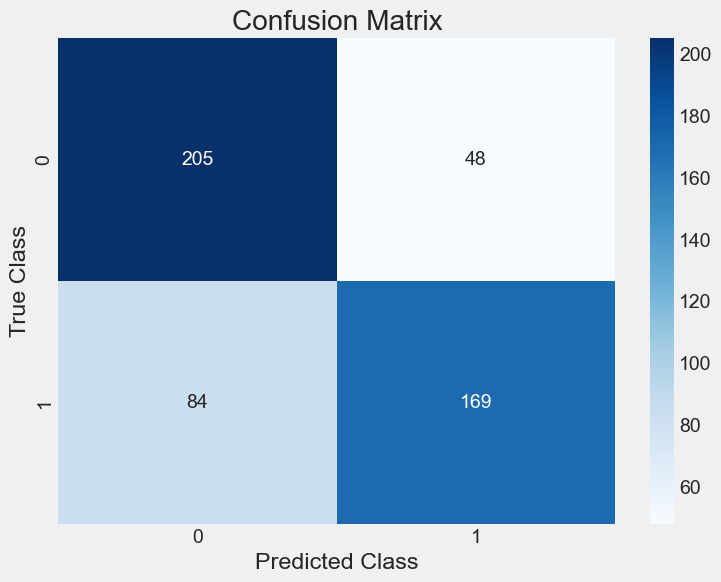

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded vectors to class indices using argmax
y_true_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_one_hot_output, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [59]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_one_hot_output, target_names=['No Autism','Austism'])
print(rapor)

              precision    recall  f1-score   support

   No Autism       0.71      0.81      0.76       253
     Austism       0.78      0.67      0.72       253

   micro avg       0.74      0.74      0.74       506
   macro avg       0.74      0.74      0.74       506
weighted avg       0.74      0.74      0.74       506
 samples avg       0.74      0.74      0.74       506

